<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3 - Web APIs & NLP

## Problem Statement

Chat GPT (Chat Generative Pre-trained Transformer) was released in November 2023. Chat GPT is being used for translation, conversational AI,  coding, and education ([source](https://research.aimultiple.com/chatgpt-use-cases/#textual-applications)). Chat GPT seems to be useful. As a data scientist, we wish to explore the difference between ChatGPT’s response and humans' response. To be able to do that we need a model that can recognize whether the text is AI response or human response. The purpose of this project is to build a classification model by collecting all of the text written by both human and AI on the responses to the same question using Logistic Regression, Naive Bayes, and KNeighborsClassifier model, so that we can train a model to learn how to figure out whether text is human written or ai written.


### Contents:
- [Preprocessing and Modeling](#Preprocessing-and-Modeling)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

### Data Collection

Human answers and questions were collected from Reddit by using PRAW (The Python Reddit API Wrapper) ([read more about PRAW](https://praw.readthedocs.io/en/stable/)). List of six subreddit topics chosen were "NoStupidQuestions", "Questions", "Askreddit", "MorbidQuestions", "TooAfraidToAsk”, and "AskScienceFiction". Collected around 900 questions and top comments in each subreddit topic. The AI answers were collected from Openai API ([read more about OpenAI](https://openai.com/blog/openai-api)) by asking the same questions as were collected from Reddit to ChatGPT. Saved the data collected from each topic as a csv file. Combine those csv files together for a full dataset with questions, human response and AI response. 


### Dataset

* [`project3_answer.csv`]('../data/project3_answer.csv'): Human answer and AI answer

**Brief description of the contents for each dataset.**

There are two columns in the dataset:

* First column: List of human answer and AI answer

* Second column: List of 1 and 0, 1 stand for human answer and 0 stand for AI answer


### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|answer|object|project3_answer|List of human answer and AI answer| 
|result|int64|project3_answer|List of 1 and 0, 1 stand for human answer and 0 stand for AI answer|

## Preprocessing and Modeling

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, precision_score, f1_score, accuracy_score
from sklearn.ensemble import AdaBoostClassifier

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('../data/project3_answer.csv')

In [3]:
df.head()

,Unnamed: 0,answer,result
0,0,It's all I have,1
1,1,3 months minimum and I'd watch it\n\nThanks fo...,1
2,2,"“I recognize the council has made a decision, ...",1
3,3,what about subs that crosspost from other subs...,1
4,4,Found this after accidentally losing my place ...,1


In [4]:
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,answer,result
0,It's all I have,1
1,3 months minimum and I'd watch it\n\nThanks fo...,1
2,"“I recognize the council has made a decision, ...",1
3,what about subs that crosspost from other subs...,1
4,Found this after accidentally losing my place ...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   answer  10834 non-null  object
 1   result  10834 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 169.4+ KB


In [6]:
df.isnull().sum()

answer    0
result    0
dtype: int64

In [7]:
df['result'].value_counts(normalize=True)

1    0.5
0    0.5
Name: result, dtype: float64

In [13]:
# set up train test split

In [14]:
X = df['answer']
y = df['result']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, stratify=y)

In [16]:
cvec = CountVectorizer()

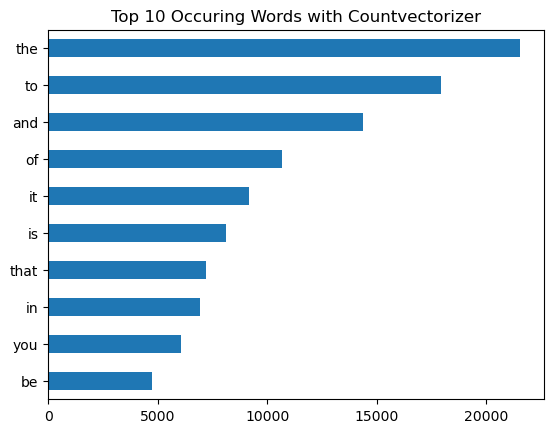

In [17]:
X_train_df = pd.DataFrame(cvec.fit_transform(X_train).todense(), 
                          columns=cvec.get_feature_names_out())

# plot top occuring words
X_train_df.sum().sort_values().tail(10).plot(kind = 'barh')
plt.title('Top 10 Occuring Words with Countvectorizer');

In [18]:
# Top 10 words are in the stop word list. 

In [19]:
tvec= TfidfVectorizer()

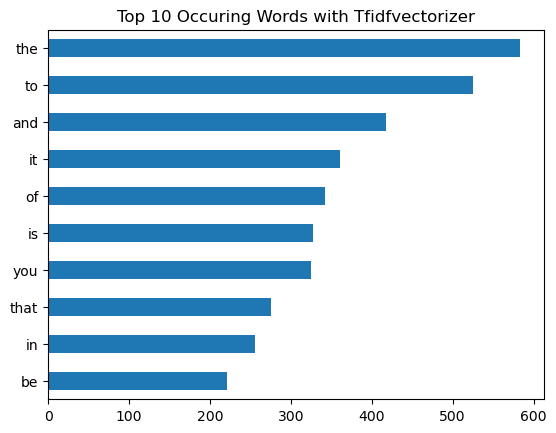

In [20]:
X_train_df = pd.DataFrame(tvec.fit_transform(X_train).todense(), 
                          columns=tvec.get_feature_names_out())

# plot top occuring words
X_train_df.sum().sort_values().tail(10).plot(kind='barh')
plt.title('Top 10 Occuring Words with Tfidfvectorizer');

#### Countvectorizer and Tfidfvectorizer have the same top ten occuring words 

In [21]:
nltk_stop = stopwords.words('english') #nltk stopword
nltk_stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
print(CountVectorizer(stop_words = 'english').get_stop_words())

frozenset({'at', 'which', 'only', 'will', 'down', 'therefore', 'across', 'serious', 'sometimes', 'cant', 'anything', 'beforehand', 'mill', 'its', 'else', 'now', 'elsewhere', 'ten', 'whether', 'whole', 'along', 'either', 'that', 'both', 'his', 'herein', 'what', 'very', 'everywhere', 'myself', 'however', 'thru', 'thin', 're', 'became', 'how', 'from', 'found', 'sixty', 'take', 'someone', 'several', 'your', 'detail', 'around', 'cry', 'de', 'themselves', 'himself', 'mostly', 'being', 'whereafter', 'hereafter', 'some', 'whither', 'nowhere', 'hers', 'eg', 'should', 'thereupon', 'everyone', 'six', 'we', 'been', 'one', 'un', 'last', 'thick', 'least', 'within', 'during', 'twelve', 'our', 'this', 'ltd', 'although', 'con', 'back', 'nine', 'thus', 'anyhow', 'while', 'me', 'until', 'for', 'such', 'whereas', 'get', 'seeming', 'fifty', 'yet', 'because', 'empty', 'top', 'made', 'him', 'third', 'cannot', 'every', 'before', 'you', 'thereafter', 'through', 'whereby', 'yourself', 'about', 'out', 'seems', '

In [23]:
# nltk stop word list and Countvectorizer stop word list are different, 
# use both for modeling.

In [24]:
y_train.value_counts(normalize=True) #baseline score

1    0.500062
0    0.499938
Name: result, dtype: float64

#### Use this function to create a result dataframe for all the model (from lesson 2.14)

In [25]:
def evaluation(X_test, y_test, preds, model):
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    acc = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds, pos_label = 1)
    prec = precision_score(y_test, preds, pos_label = 1)
    f1 = f1_score(y_test, preds, pos_label = 1)

    print(f'accuracy: {acc}')
    print(f'recall: {recall}')
    print(f'precision: {prec}')
    print(f'f1 score: {f1}')

    return {
        'accuracy': acc,
        'recall': recall,
        'precision': prec,
        'f1_score': f1
    }

#### Model 1: CountVectorizer & BernoulliNB

In [26]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('bnb', BernoulliNB())
])

In [27]:
pipe_params = {
    'cvec__max_features' : [20000, 40000],  
    'cvec__min_df' : [3, 5],
    'cvec__max_df' : [0.9, 0.95],
    'cvec__ngram_range' : [(1, 1),(1, 2)],
    'cvec__stop_words' : [None ,'english', nltk_stop]
}

In [28]:
gs = GridSearchCV(pipe, pipe_params, cv=5)

In [29]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('bnb', BernoulliNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [20000, 40000],
                         'cvec__min_df': [3, 5],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english',
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', ...]]})

In [30]:
gs.best_score_

0.8914461538461538

In [31]:
gs.score(X_train,y_train)

0.9254153846153846

In [32]:
gs.score(X_test,y_test)

0.8881506090808416

In [33]:
gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 40000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None}

In [34]:
preds1 = gs.predict(X_test)

In [35]:
scores = [] #list of the eveluation

accuracy: 0.8881506090808416
recall: 0.9579025110782866
precision: 0.8405703175631886
f1 score: 0.8954090438384534


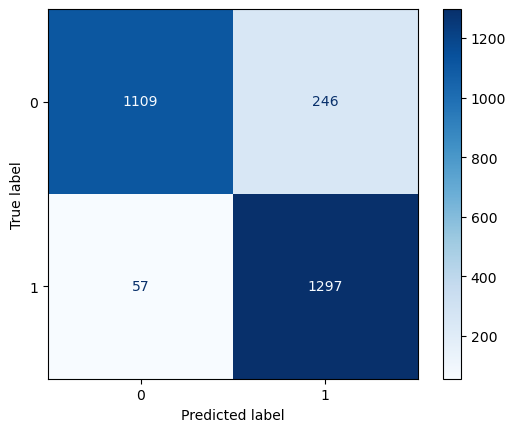

In [36]:
scores.append(evaluation(X_test, y_test, preds1, gs))

#### Result of model 1 

* The accuracy score or test score (around 0.888) is higher than baseline score (around 0.5) and 0.037 lower than train score (around 0.925). This model has high accuracy score but it is overfit.
* The recall score is high (around 0.958), out of all the human anwer, 95.8% are predicted as the human answer.
* The precision score (around 0.841) is lower than recall score, out of all the answers that predicted as human answer, 84.1% are human answer. 
* F1 score is 0.895, this model can be use to predict whether the text is humnan written or ai written.    


#### Model 2: CountVectorizer & LogisticRegression 

In [37]:
pipe_2 = Pipeline([
    ('cvec', CountVectorizer()),
    ('logr', LogisticRegression(max_iter=1000))
])

In [38]:
gs_2 = GridSearchCV(pipe_2, pipe_params, cv=5)
gs_2.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('logr',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [20000, 40000],
                         'cvec__min_df': [3, 5],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english',
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', ...]]})

In [39]:
gs_2.score(X_train,y_train)

0.9931076923076924

In [40]:
gs_2.score(X_test,y_test)

0.9121447028423773

In [41]:
gs_2.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 20000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None}

In [42]:
preds2 = gs_2.predict(X_test)

accuracy: 0.9121447028423773
recall: 0.9283604135893648
precision: 0.8991416309012875
f1 score: 0.913517441860465


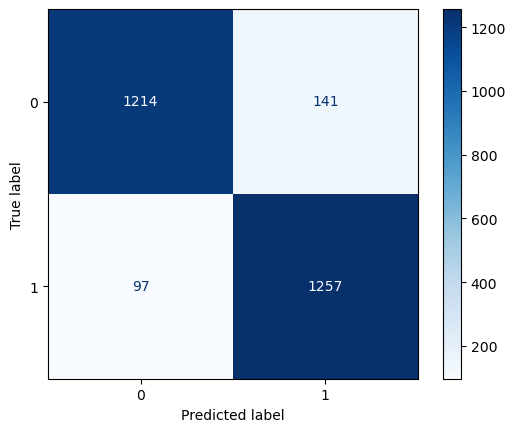

In [43]:
scores.append(evaluation(X_test, y_test, preds2, gs_2))

#### Result of model 2 

* The accuracy score or test score (around 0.912) is higher than baseline score and model 1. The test score is 0.081 lower than train score (around 0.993). This model is overfit. 
* The recall score is lower than model 1 (around 0.928), out of all the human anwer, 92.8% are predicted as the human answer.
* The precision score is lower than recall score (around 0.899), out of all the answers that predicted as human answer, 89.9% are human answer. 
* F1 score is 0.914 and higher than f1 score of model 1 , this model can be use to predict whether the text is humnan written or ai written.    


#### Model 3: CountVectorizer & KNeighborsClassifier

In [44]:
pipe_3 = Pipeline([
    ('cvec', CountVectorizer()),
    ('ss', StandardScaler(with_mean=False)),
    ('knn', KNeighborsClassifier())
])

In [45]:
gs_3 = GridSearchCV(pipe_3, pipe_params, cv=5)
gs_3.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('ss', StandardScaler(with_mean=False)),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [20000, 40000],
                         'cvec__min_df': [3, 5],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english',
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', ...]]})

In [46]:
gs_3.score(X_train,y_train)

0.6440615384615385

In [47]:
gs_3.score(X_test,y_test)

0.5496493170911776

In [48]:
gs_3.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 20000,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': None}

In [49]:
preds3 = gs_3.predict(X_test)

accuracy: 0.5496493170911776
recall: 0.9194977843426884
precision: 0.5284380305602716
f1 score: 0.6711590296495957


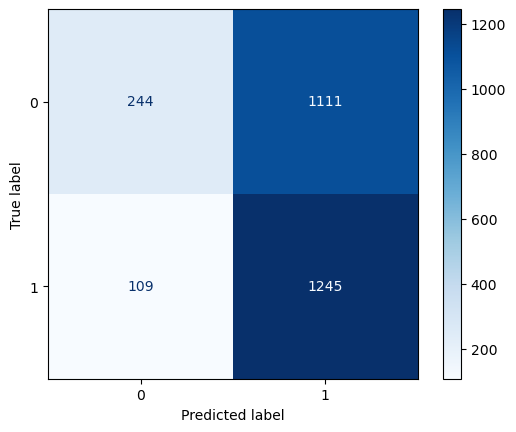

In [50]:
scores.append(evaluation(X_test, y_test, preds3, gs_3))

#### Result of model 3 

* The accuracy score or test score (around 0.550) is higher than baseline score (around 0.5) and 0.094 lower than train score (around 0.644). This model is overfit and have lower accuracy score than model 1 and 2
* The recall score is high (around 0.919), out of all the human anwer, 91.9% are predicted as the human answer.
* The precision score is lower than recall score (around 0.528), out of all the answers that predicted as human answer, 52.8% are human answer. 
* F1 score is 0.671, this model cannot be use to predict whether the text is humnan written or ai written. 

#### Model 4 : CountVectorizer & MultinomialNB

In [51]:
pipe_4 = Pipeline([
    ('cvec', CountVectorizer()),
    ('mnb', MultinomialNB())
])

In [52]:
gs_4 = GridSearchCV(pipe_4, pipe_params, cv=5)

In [53]:
gs_4.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('mnb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [20000, 40000],
                         'cvec__min_df': [3, 5],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english',
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', ...]]})

In [54]:
gs_4.score(X_train,y_train)

0.9261538461538461

In [55]:
gs_4.score(X_test,y_test)

0.8863049095607235

In [56]:
gs_4.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 40000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None}

In [57]:
preds4 = gs_4.predict(X_test)

accuracy: 0.8863049095607235
recall: 0.912850812407681
precision: 0.8667601683029453
f1 score: 0.889208633093525


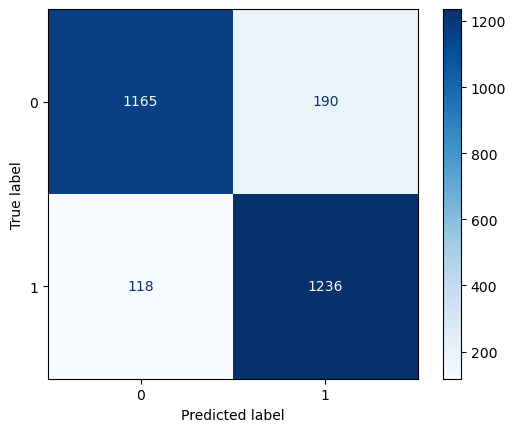

In [58]:
scores.append(evaluation(X_test, y_test, preds4, gs_4))

#### Result of model 4 

* The accuracy score or test score (around 0.886) is higher than baseline score (around 0.5) and 0.04 lower than train score (around 0.926). This model is overfit and have similar score with model 1.
* The recall score is high (around 0.913), out of all the human anwer, 91.3% are predicted as the human answer.
* The precision score is lower than recall score (around 0.867), out of all the answers that predicted as human answer, 86.7% are human answer. 
* F1 score is 0.889, this model can be use to predict whether the text is humnan written or ai written.    

#### Result after built 4 model

* The best param with stop_word is none and ngram_range is (1,2). The best classification is LogisticRegression. Model 2 is the best. Next step is try to improve the overfit and increase the accuracy score.  

#### Model 5: TfidfVectorizer & LogisticRegression

In [59]:
pipe_5 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('logr', LogisticRegression(solver='liblinear', max_iter=10000))
])

In [60]:
pipe_params_2= {
    'tvec__max_features' : [20000, 40000],
    'tvec__stop_words' : [None],
    'tvec__ngram_range' : [(1, 2)],
    'logr__penalty' :['l1','l2'],
}

In [61]:
gs_5 = GridSearchCV(pipe_5,pipe_params_2,cv=5)
gs_5.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('logr',
                                        LogisticRegression(max_iter=10000,
                                                           solver='liblinear'))]),
             param_grid={'logr__penalty': ['l1', 'l2'],
                         'tvec__max_features': [20000, 40000],
                         'tvec__ngram_range': [(1, 2)],
                         'tvec__stop_words': [None]})

In [62]:
gs_5.score(X_train,y_train)

0.9447384615384615

In [63]:
gs_5.score(X_test,y_test)

0.902547065337763

In [64]:
gs_5.best_params_

{'logr__penalty': 'l2',
 'tvec__max_features': 20000,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': None}

In [65]:
preds5 = gs_5.predict(X_test)

accuracy: 0.902547065337763
recall: 0.9165435745937962
precision: 0.8915229885057471
f1 score: 0.9038601602330663


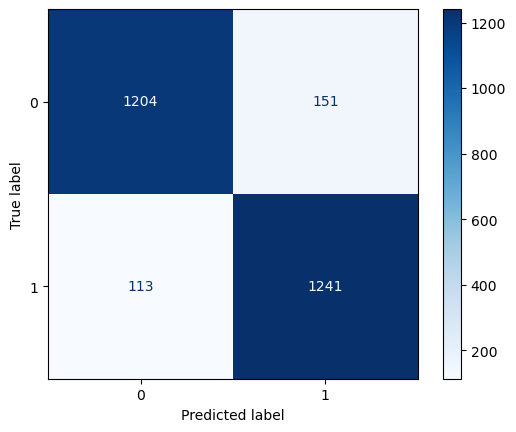

In [66]:
scores.append(evaluation(X_test, y_test, preds5, gs_5))

#### Result of model 5 

* The accuracy score or test score (around 0.903) is higher than baseline score and lower than accuracy score of model 2. The test score is 0.042 lower than train score (around 0.945). The different between train and test is improved compare to model 2 but still overfit.
* The recall score (around 0.917), out of all the human anwer, 91.7% are predicted as the human answer.
* The precision score is lower than recall score (around 0.892), out of all the answers that predicted as human answer, 89.2% are human answer. 
* F1 score is 0.904, this model can be use to predict whether the text is humnan written or ai written.    


In [67]:
pd.DataFrame(scores, index=['model 1 (cvec & bnb)', 'model 2 (cvec & logr)', 
             'model 3 (cvec & knn)','model 4 (cvec & mnb)', 'model 5 (tfidf & logr)']) 

,accuracy,recall,precision,f1_score
model 1 (cvec & bnb),0.888151,0.957903,0.840570,0.895409
model 2 (cvec & logr),0.912145,0.928360,0.899142,0.913517
model 3 (cvec & knn),0.549649,0.919498,0.528438,0.671159
model 4 (cvec & mnb),0.886305,0.912851,0.866760,0.889209
model 5 (tfidf & logr),0.902547,0.916544,0.891523,0.903860


#### Model 6: CountVectorizer and LogisticRegression with Lasso

In [68]:
pipe_6 = Pipeline([
    ('cvec', CountVectorizer()),
    ('logr', LogisticRegression(solver='liblinear', max_iter=10000))
])

In [69]:
pipe_params_3 = {
    'cvec__max_features' : [20000, 40000],  
    'cvec__min_df' : [2, 3],
    'cvec__max_df' : [0.85, 0.9],
    'cvec__ngram_range' : [(1, 2)],
    'cvec__stop_words' : [None],
    'logr__penalty' :['l1']
}

In [70]:
gs_6 = GridSearchCV(pipe_6, pipe_params_3, cv=5)
gs_6.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('logr',
                                        LogisticRegression(max_iter=10000,
                                                           solver='liblinear'))]),
             param_grid={'cvec__max_df': [0.85, 0.9],
                         'cvec__max_features': [20000, 40000],
                         'cvec__min_df': [2, 3], 'cvec__ngram_range': [(1, 2)],
                         'cvec__stop_words': [None], 'logr__penalty': ['l1']})

In [71]:
gs_6.score(X_train,y_train)

0.9763692307692308

In [72]:
gs_6.score(X_test,y_test)

0.9102990033222591

In [73]:
gs_6.best_params_

{'cvec__max_df': 0.85,
 'cvec__max_features': 40000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None,
 'logr__penalty': 'l1'}

In [74]:
preds6 = gs_6.predict(X_test)

accuracy: 0.9102990033222591
recall: 0.9268833087149188
precision: 0.8970693352394568
f1 score: 0.9117326552851436


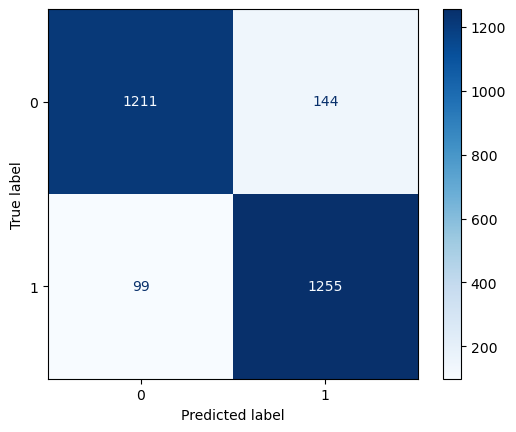

In [75]:
scores.append(evaluation(X_test, y_test, preds6, gs_6))

#### Result of model 6

* Try to improve the overfit of model 2 with lasso, the overfit did improve but the accuracy and metrics score is lower than model 2.

#### Model 7: AdaBoostClassifier and LogisticRegression

In [81]:
pipe_7 = Pipeline([
    ('cvec', CountVectorizer()),
    ('abc', AdaBoostClassifier(random_state = 42,
                               estimator = LogisticRegression())),
                               
])

In [82]:
pipe_params_4 = {
    'cvec__max_features' : [20000, 40000],  
    'cvec__min_df' : [2, 3],
    'cvec__max_df' : [0.85, 0.9],
    'cvec__ngram_range' : [(1, 2)],
    'cvec__stop_words' : [None],
    'abc__n_estimators' :[100, 200]
}

In [83]:
gs_7 = GridSearchCV(pipe_7, pipe_params_4, cv=5)
gs_7.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('abc',
                                        AdaBoostClassifier(estimator=LogisticRegression(),
                                                           random_state=42))]),
             param_grid={'abc__n_estimators': [100, 200],
                         'cvec__max_df': [0.85, 0.9],
                         'cvec__max_features': [20000, 40000],
                         'cvec__min_df': [2, 3], 'cvec__ngram_range': [(1, 2)],
                         'cvec__stop_words': [None]})

In [84]:
gs_7.score(X_train,y_train)

0.9489230769230769

In [85]:
gs_7.score(X_test,y_test)

0.9102990033222591

In [86]:
gs_7.best_params_

{'abc__n_estimators': 200,
 'cvec__max_df': 0.85,
 'cvec__max_features': 20000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None}

In [87]:
preds7 = gs_7.predict(X_test)

accuracy: 0.9102990033222591
recall: 0.9327917282127031
precision: 0.8925795053003533
f1 score: 0.9122426868905742


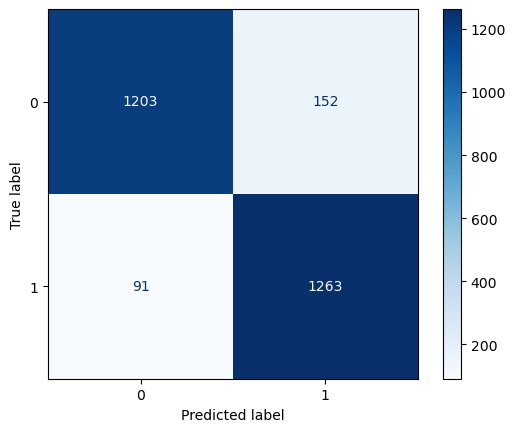

In [88]:
scores.append(evaluation(X_test, y_test, preds7, gs_7))

#### Result of model 7

The accuracy score of model 7 is the same with model 6, the recall score increase, the precision score decrease, and f1 score increase compare to model 6.

### The summary of all models

In [89]:
pd.DataFrame(scores, index=['model 1 (cvec & bnb)', 'model 2 (cvec & logr(l2))', 
             'model 3 (cvec & knn)','model 4 (cvec & mnb)', 
                            'model 5 (tfidf & logr(l2))','model 6 (cvec & logr(l1))','model 7 (cvec & abc)']) 

,accuracy,recall,precision,f1_score
model 1 (cvec & bnb),0.888151,0.957903,0.840570,0.895409
model 2 (cvec & logr(l2)),0.912145,0.928360,0.899142,0.913517
model 3 (cvec & knn),0.549649,0.919498,0.528438,0.671159
model 4 (cvec & mnb),0.886305,0.912851,0.866760,0.889209
model 5 (tfidf & logr(l2)),0.902547,0.916544,0.891523,0.903860
model 6 (cvec & logr(l1)),0.910299,0.926883,0.897069,0.911733
model 7 (cvec & abc),0.910299,0.932792,0.892580,0.912243


## Conclusions and Recommendations

### Table of Result

|Type of Model|Accuracy score|Recall score|Precision score|F1 score|
|---|---|---|---|---|
|Model 1 (CountVectorizer & BernoulliNB)|0.888151|0.957903|0.840570|0.895409|
|Model 2 (CountVectorizer & LogisticRegression)|0.912145|0.928360|0.899142|0.913517|
|Model 3 (CountVectorizer & KNeighborsClassifier)|0.549649|0.919498|0.528438|0.671159|
|Model 4 (CountVectorizer & MultinomialNB)|0.886305|0.912851|0.866760|0.889209|
|Model 5: TfidfVectorizer & LogisticRegression|0.902547|0.916544|0.891523|0.903860|
|Model 6: CountVectorizer and LogisticRegression with Lasso|0.910299|0.926883|0.897069|0.911733|
|Model 7: AdaBoostClassifier and LogisticRegression|0.910299|0.932792|0.892580|0.912243|

### Conclusion

* LogisticRegression gave a higher accuracy score than KNeighborsClassifier, BernoulliNB and MultinomialNB. 
* KNeighborsClassifier has the lowest accuracy score. Model 3 cannot be use to identify whether the text is human written or ai written.
* Model 2 has the highest accuracy score and F1 score but model 2 has the difference between test score and train score highest. Model 2 is overfit. 
* Model 5, model 6 and model 7 were built to improve the overfit and accuracy score of model 2. The accuracy score of those models are lower than model 2 but the difference between train score and test score did improve.
* Model 1 and 4 also have a good accuracy score. The difference between train score and test score of model 1 and 4 are lower than the difference between train score and test score of model 2. 
* Model 2, model 6 and model 7 can be used to identify whether the text is human written or ai written.
* In the future, apply different classification and different params to find a higher accuracy score.  
